In [68]:
#Importing libraries needed for this project
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas import *
from pylab import rcParams
import datetime as dt
import folium

# Citi Bike Ridership Exploratory Analysis

The main aim of this project is to perform visualizations and identify significant patterns of Citi Bike Ridership. 


In [69]:
#Loading original data into dataframe
df = pd.read_csv(r'C:\Users\pumci\Desktop\LAG_DATA\201907-citibike-tripdata.csv')
#Printing first three observations
df.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,897,2019-07-01 00:00:00.1320,2019-07-01 00:14:58.0040,493.0,W 45 St & 6 Ave,40.756800,-73.982912,454.0,E 51 St & 1 Ave,40.754557,-73.96593,18340,Subscriber,1966,1
1,267,2019-07-01 00:00:05.1780,2019-07-01 00:04:32.4500,3143.0,5 Ave & E 78 St,40.776321,-73.964274,3226.0,W 82 St & Central Park West,40.782750,-73.97137,21458,Customer,1996,1
2,2201,2019-07-01 00:00:05.2130,2019-07-01 00:36:46.7490,317.0,E 6 St & Avenue B,40.724537,-73.981854,3469.0,India St & West St,40.731814,-73.95995,39874,Subscriber,1986,1


In [70]:
#Printing last three observations
df.tail(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
2181061,1302,2019-07-31 23:59:52.8280,2019-08-01 00:21:35.1090,331.0,Pike St & Monroe St,40.711731,-73.991930,309.0,Murray St & West St,40.714979,-74.013012,39730,Subscriber,1966,2
2181062,353,2019-07-31 23:59:57.1130,2019-08-01 00:05:50.1350,3255.0,8 Ave & W 31 St,40.750585,-73.994685,482.0,W 15 St & 7 Ave,40.739355,-73.999318,30149,Subscriber,1994,1
2181063,274,2019-07-31 23:59:57.4870,2019-08-01 00:04:32.2070,3459.0,E 53 St & 3 Ave,40.757632,-73.969306,3134.0,3 Ave & E 62 St,40.763126,-73.965269,25344,Subscriber,1994,2


In [71]:
#Checking dataset's size
df.shape

(2181064, 15)

In [72]:
#Priniting object types of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181064 entries, 0 to 2181063
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         float64
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           float64
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   int64  
 12  usertype                 object 
 13  birth year               int64  
 14  gender                   int64  
dtypes: float64(6), int64(4), object(5)
memory usage: 249.6+ MB


In [73]:
#Displaying simple statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tripduration,2181064.0,1035.359728,10779.684630,61.000000,385.000000,658.000000,1155.000000,2621244.000
start station id,2181010.0,1673.220622,1477.083515,72.000000,382.000000,514.000000,3296.000000,3799.000
start station latitude,2181064.0,40.737025,0.030701,40.655400,40.717227,40.737050,40.757570,40.866
start station longitude,2181064.0,-73.981797,0.020370,-74.025353,-73.995960,-73.985162,-73.971092,-73.881
end station id,2181010.0,1668.867471,1477.700063,72.000000,380.000000,514.000000,3300.000000,3799.000
end station latitude,2181064.0,40.736668,0.030652,40.655400,40.716887,40.736502,40.757148,40.866
end station longitude,2181064.0,-73.981927,0.020491,-74.050990,-73.996010,-73.985649,-73.971092,-73.881
bikeid,2181064.0,29767.469195,7686.671733,14529.000000,25220.000000,30997.000000,35355.000000,40002.000
birth year,2181064.0,1980.646956,12.024585,1885.000000,1970.000000,1983.000000,1990.000000,2003.000
gender,2181064.0,1.159509,0.560198,0.000000,1.000000,1.000000,1.000000,2.000


In [74]:
#Getting coulmns in the dataset
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

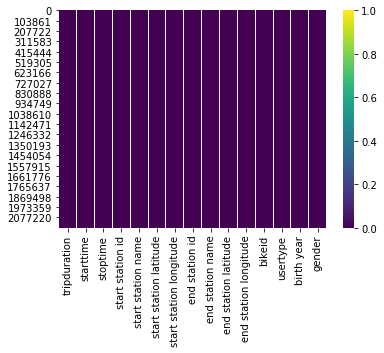

In [75]:
#Visualizinge location of missing values. 
sns.heatmap(df.isnull(), cmap='viridis')

The data is well organized and clean. In other words,  there is no missing values.

## Who is riding Citi Bike?

Text(0.5, 1, 'Ride Count by Birth Year')

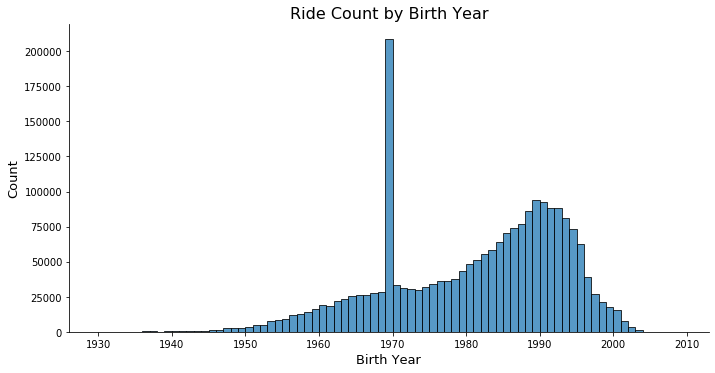

In [156]:
#Showing distribution Citi Bike Rider's age
sns.displot(data=df,x="birth year" , bins=range(1930,2010), aspect=10/5)
plt.xlabel("Birth Year", fontsize = 13)
plt.ylabel("Count", fontsize = 13)
plt.title("Ride Count by Birth Year", fontsize = 16)

In [77]:
#Finding out which year has the most outliers 
df['birth year'].value_counts()

1969    208704
1989     94111
1990     92616
1991     88529
1992     88030
         ...  
1895         2
1922         2
1927         2
1905         1
1920         1
Name: birth year, Length: 104, dtype: int64

Text(0.5, 1, 'Ride Count by Birth Year & Gender')

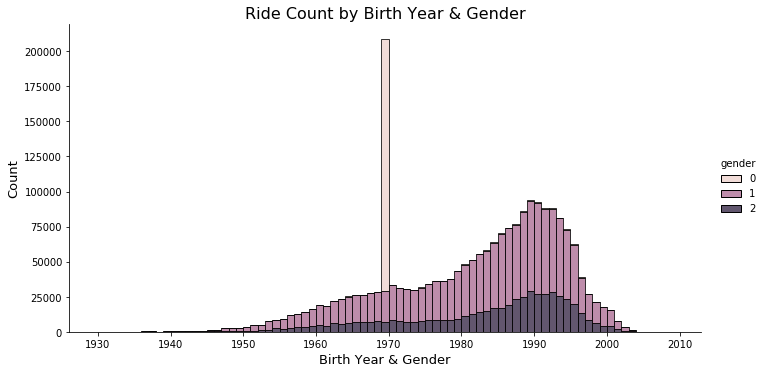

In [157]:
#Showing distribution Citi Bike Rider's age and gender
sns.displot(data=df,x="birth year" , bins=range(1930,2010), hue='gender',  multiple='stack', aspect=10/5)
plt.xlabel("Birth Year & Gender", fontsize = 13)
plt.ylabel("Count", fontsize = 13)
plt.title("Ride Count by Birth Year & Gender", fontsize = 16)


Ride count by gender plot is skewed. The reason behind this is because we have outliers with values above 19,000 (9%). This may have happened due to an error in the built-in tracking system of the Citi bike system. 

In [79]:
#Finding out number of male, female and unknown
df['gender'].value_counts()

1    1441107
2     543928
0     196029
Name: gender, dtype: int64

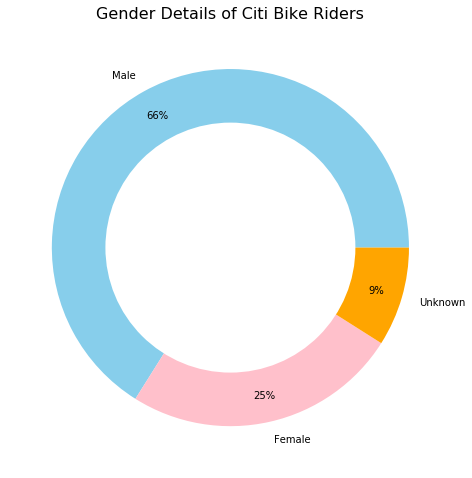

In [153]:
#Donut chart detailing gender of Citi Bike Riders

fig = plt.figure(figsize=(8,9))
Race = ['Male', 'Female', 'Unknown']
num_race = [1441107, 543928, 196029]

colors = ['skyblue', 'pink','orange']
plt.pie(num_race, colors=colors, labels=Race,
        autopct='%1.0f%%', pctdistance=0.85)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Gender Details of Citi Bike Riders', fontsize=16)
  
plt.show()

Men are riding more – far more – than women. In July 2019, 66% of riders were male, 25% were female and 9% were unknown.

In [154]:
#Implementing mask function in order not to display outlier. 
skip = (df['birth year'] < 1930) | (df['gender'] == 0) 
df['age'] = (2010 - df['birth year']).mask(skip,None)

Text(0.5, 1, 'Ride Count by Age & Gender')

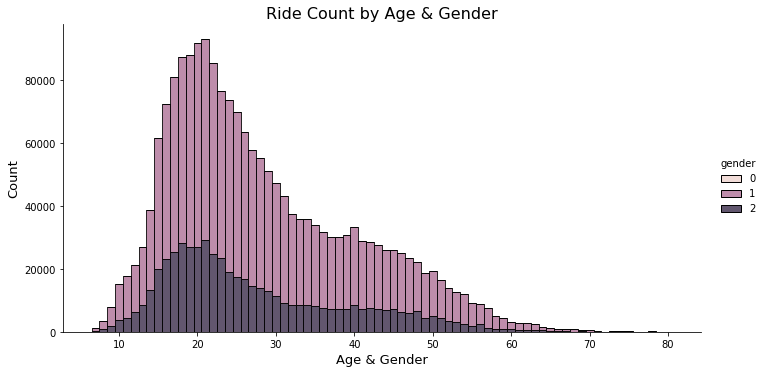

In [155]:
#Plot without outlier
sns.displot(data=df, x='age', hue='gender', multiple='stack',  aspect=10/5)
plt.xlabel("Age & Gender", fontsize = 13)
plt.ylabel("Count", fontsize = 13)
plt.title("Ride Count by Age & Gender", fontsize = 16)

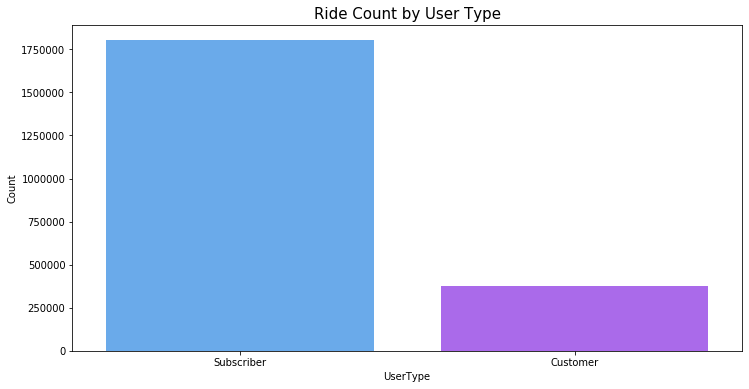

In [83]:
#Bar chart of Citi Bike user type
fig = plt.figure(figsize=(12,6))
sns.countplot(x='usertype', data=df, palette='cool')
plt.xlabel('UserType')
plt.ylabel('Count')
plt.title('Ride Count by User Type', fontsize=15)
plt.show()

Text(0.5, 1, 'Ride Count by UserType & Age')

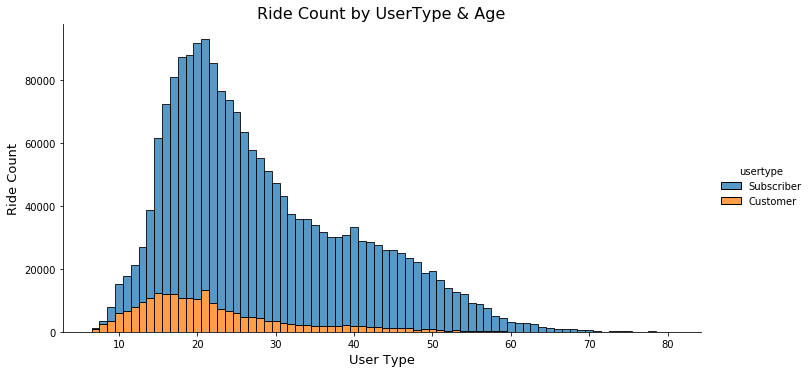

In [84]:
#Displaying Ride Count by usertype and gender
sns.displot(data=df, x='age', hue='usertype', multiple='stack',  aspect=10/5)
plt.xlabel("User Type", fontsize = 13)
plt.ylabel("Ride Count", fontsize = 13)
plt.title("Ride Count by UserType & Age", fontsize = 16)

## How long are they riding?

Text(0.5, 1, 'Ride Length in Minutes')

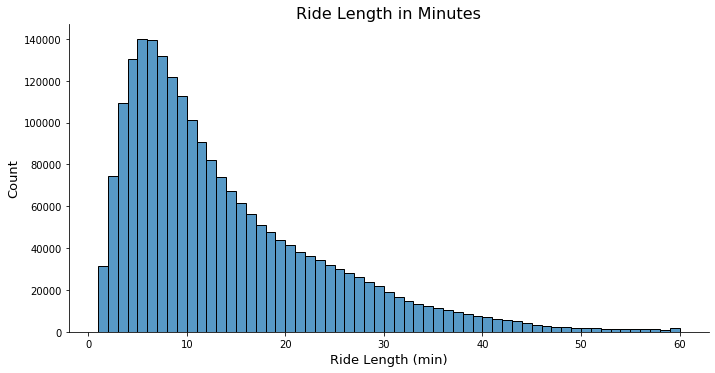

In [85]:
#Displaying ride lenght in minutes
df['tripminutes'] = df['tripduration'] // 60
sns.displot(data=df,x="tripminutes", bins=range(1,61), aspect=10/5)
plt.xlabel("Ride Length (min)", fontsize = 13)
plt.ylabel("Count", fontsize = 13)
plt.title("Ride Length in Minutes", fontsize = 16)

Most NYC Citi Bike trips fall within the 3 to 10 minute range. The shorter tip is 2 min and the longest is an hour. One possible explanation for the difference is that longer rides are more likely to be attributed to tourists who are exploring the city with more time to spare.

## Which stations are most popular?

In [127]:
#Counting top 5 start stations p.1
top5 = pd.DataFrame() 
top5['Station Name']=df['start station name'].value_counts().head().index
top5['# of Starts']=df['start station name'].value_counts().head().values
#top5['Station Name'] = top5['Station Name'].cat.remove_unused_categories()
top5['Station Name'] = top5['Station Name'].astype('object')
top5.head()

,Station Name,# of Starts
0,Pershing Square North,16348
1,12 Ave & W 40 St,12983
2,West St & Chambers St,12871
3,8 Ave & W 31 St,12490
4,E 17 St & Broadway,12456


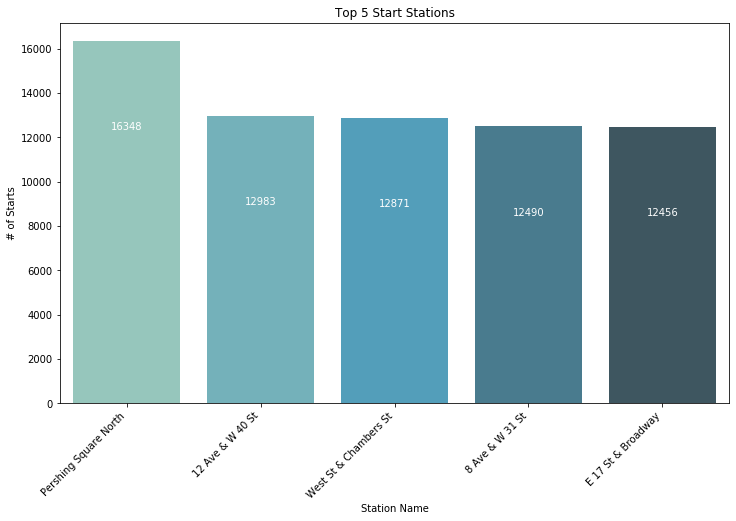

In [116]:
#Plot of 5 top start stations p.2
ax = sns.barplot('Station Name', '# of Starts', data = top5, palette="GnBu_d")
ax.set_title('Top 5 Start Stations', fontsize = 12)
rcParams['figure.figsize'] = 12,7
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha = 'right')
for index, row in top5.iterrows():
    ax.text(index,row['# of Starts']-4000,row['# of Starts'], 
            color='white', ha="center", fontsize = 10)

plt.show()

The most popular starting point for Citi Bike rides in New York City is at Pershing Square North. 

In [169]:
#Counting top 5 start stations p.1
etop5 = pd.DataFrame() 
etop5['Station Name']=df['end station name'].value_counts().head().index
etop5['# of Ends']=df['end station name'].value_counts().head().values
#top5['Station Name'] = top5['Station Name'].cat.remove_unused_categories()
etop5['Station Name'] = etop5['Station Name'].astype('object')
etop5.head()

,Station Name,# of Ends
0,Pershing Square North,16124
1,West St & Chambers St,13643
2,12 Ave & W 40 St,13230
3,E 17 St & Broadway,12901
4,8 Ave & W 31 St,12433


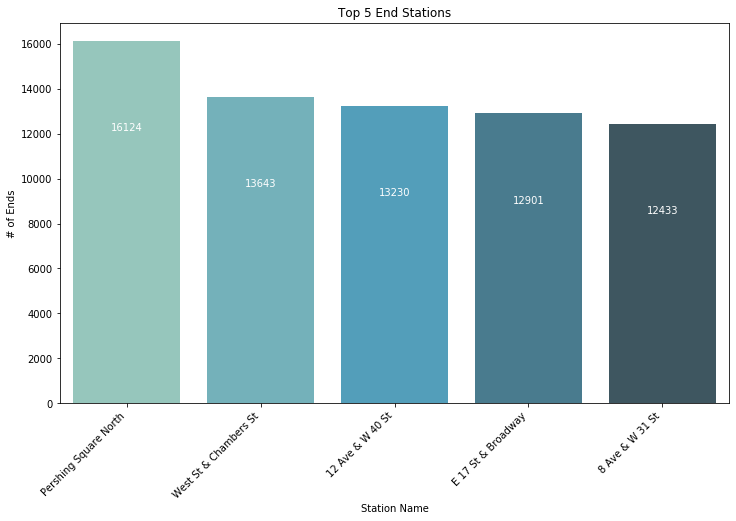

In [170]:
#Plot of 5 top start stations p.2
ax = sns.barplot('Station Name', '# of Ends', data = etop5, palette="GnBu_d")
ax.set_title('Top 5 End Stations', fontsize = 12)
rcParams['figure.figsize'] = 12,7
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha = 'right')
for index, row in top5.iterrows():
    ax.text(index,row['# of Ends']-4000,row['# of Ends'], 
            color='white', ha="center", fontsize = 10)

plt.show()

The most popular ending point for Citi Bike rides in New York City is at Pershing Square North. 

#### Grouping data of popular start stations for a map (long and lat)

In [140]:
#Filltering Female ('2') riders only by using query function 
df_female = df.query('gender==2')
df_female.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age,tripminutes
14,366,2019-07-01 00:01:06.5270,2019-07-01 00:07:13.1350,3578.0,Park Pl & Franklin Ave,40.674181,-73.956495,3581.0,Underhill Ave & Lincoln Pl,40.674012,-73.967146,38092,Subscriber,1988,2,22,6
22,536,2019-07-01 00:01:39.0260,2019-07-01 00:10:35.7690,116.0,W 17 St & 8 Ave,40.741776,-74.001497,462.0,W 22 St & 10 Ave,40.746920,-74.004519,27844,Subscriber,1963,2,47,8
34,469,2019-07-01 00:02:44.4640,2019-07-01 00:10:34.1510,3715.0,Driggs Ave & N 9 St,40.718170,-73.955201,3108.0,Nassau Ave & Russell St,40.725570,-73.944340,25821,Subscriber,1963,2,47,7


In [152]:
#Counting top 5 start stations p.1
ftop5 = pd.DataFrame() 
ftop5['Station Name']=df_female['start station name'].value_counts().head().index
ftop5['Count']=df_female['start station name'].value_counts().head().values
#ftop5['Station Name'] = ftop5['Station Name'].cat.remove_unused_categories()
ftop5['Station Name'] = ftop5['Station Name'].astype('category')
ftop5.head()

,Station Name,Count
0,West St & Chambers St,3593
1,12 Ave & W 40 St,3241
2,W 21 St & 6 Ave,3059
3,E 17 St & Broadway,3040
4,Broadway & E 22 St,2710


In [95]:
#Finding out lat and long of West St & Chambers St station
df2 = df.loc[(df['start station name'] == 'West St & Chambers St'),['start station latitude','start station longitude']]
df2.head()

,start station latitude,start station longitude
119,40.717548,-74.013221
399,40.717548,-74.013221
929,40.717548,-74.013221
1148,40.717548,-74.013221
1367,40.717548,-74.013221


In [96]:
#Finding out lat and long of 12 Ave & W 40 St for female 
df2 = df.loc[(df['start station name'] == '12 Ave & W 40 St'),['start station latitude','start station longitude']]
df2.head()

,start station latitude,start station longitude
8,40.760875,-74.002777
70,40.760875,-74.002777
140,40.760875,-74.002777
167,40.760875,-74.002777
196,40.760875,-74.002777


In [97]:
#Finding out lat and long of W 21 St & 6 Ave for female 
df2 = df.loc[(df['start station name'] == 'W 21 St & 6 Ave'),['start station latitude','start station longitude']]
df2.head()

,start station latitude,start station longitude
86,40.74174,-73.994156
102,40.74174,-73.994156
105,40.74174,-73.994156
365,40.74174,-73.994156
681,40.74174,-73.994156


In [98]:
#Finding out lat and long of E 17 St & Broadway for female
df2 = df.loc[(df['start station name'] == 'E 17 St & Broadway'),['start station latitude','start station longitude']]
df2.head()

,start station latitude,start station longitude
391,40.73705,-73.990093
896,40.73705,-73.990093
946,40.73705,-73.990093
1050,40.73705,-73.990093
9072,40.73705,-73.990093


In [99]:
#Finding out lat and long of Broadway & E 22 St for female
df2 = df.loc[(df['start station name'] == 'Broadway & E 22 St'),['start station latitude','start station longitude']]
df2.head()

,start station latitude,start station longitude
13,40.740343,-73.989551
811,40.740343,-73.989551
873,40.740343,-73.989551
1518,40.740343,-73.989551
2407,40.740343,-73.989551


In [100]:
#Filltering male by using query function 
df_male = df.query('gender==1')
df_male.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age,tripminutes
0,897,2019-07-01 00:00:00.1320,2019-07-01 00:14:58.0040,493.0,W 45 St & 6 Ave,40.756800,-73.982912,454.0,E 51 St & 1 Ave,40.754557,-73.96593,18340,Subscriber,1966,1,44,14
1,267,2019-07-01 00:00:05.1780,2019-07-01 00:04:32.4500,3143.0,5 Ave & E 78 St,40.776321,-73.964274,3226.0,W 82 St & Central Park West,40.782750,-73.97137,21458,Customer,1996,1,14,4
2,2201,2019-07-01 00:00:05.2130,2019-07-01 00:36:46.7490,317.0,E 6 St & Avenue B,40.724537,-73.981854,3469.0,India St & West St,40.731814,-73.95995,39874,Subscriber,1986,1,24,36


In [144]:
#Counting top 5 start stations for male only
ftop5 = pd.DataFrame() 
ftop5['Station Name']=df_male['start station name'].value_counts().head().index
ftop5['Count']=df_male['start station name'].value_counts().head().values
#ftop5['Station Name'] = ftop5['Station Name'].cat.remove_unused_categories()
ftop5['Station Name'] = ftop5['Station Name'].astype('object')
ftop5.head()

,Station Name,Count
0,Pershing Square North,13240
1,8 Ave & W 31 St,10208
2,E 17 St & Broadway,8664
3,Broadway & E 22 St,8569
4,Christopher St & Greenwich St,8111


In [105]:
#Finding out lat and long of Broadway & E 22 St for male 
df3 = df.loc[(df['start station name'] == 'Broadway & E 22 St'),['start station latitude','start station longitude']]
df3.head()

,start station latitude,start station longitude
13,40.740343,-73.989551
811,40.740343,-73.989551
873,40.740343,-73.989551
1518,40.740343,-73.989551
2407,40.740343,-73.989551


In [104]:
#Finding out lat and long of E 17 St & Broadway for male 
df3 = df.loc[(df['start station name'] == 'E 17 St & Broadway'),['start station latitude','start station longitude']]
df3.head()

,start station latitude,start station longitude
391,40.73705,-73.990093
896,40.73705,-73.990093
946,40.73705,-73.990093
1050,40.73705,-73.990093
9072,40.73705,-73.990093


In [106]:
#Finding out lat and long of Christopher St & Greenwich St for male
df3 = df.loc[(df['start station name'] == 'Christopher St & Greenwich St'),['start station latitude','start station longitude']]
df3.head()

,start station latitude,start station longitude
21,40.732916,-74.007114
183,40.732916,-74.007114
563,40.732916,-74.007114
629,40.732916,-74.007114
650,40.732916,-74.007114


In [103]:
#Finding out lat and long of 8 Ave & W 31 St for male 
df3 = df.loc[(df['start station name'] == '8 Ave & W 31 St'),['start station latitude','start station longitude']]
df3.head()

,start station latitude,start station longitude
145,40.750585,-73.994685
286,40.750585,-73.994685
564,40.750585,-73.994685
568,40.750585,-73.994685
725,40.750585,-73.994685


In [102]:
#Finding out lat and long of Pershing Square North for male
df3 = df.loc[(df['start station name'] == 'Pershing Square North'),['start station latitude','start station longitude']]
df3.head()

,start station latitude,start station longitude
319,40.751873,-73.977706
496,40.751873,-73.977706
769,40.751873,-73.977706
1166,40.751873,-73.977706
1411,40.751873,-73.977706


In [107]:
# NYC latitude and longitude values
latitude = 40.71427
longitude = -74.00597

#Creating map and display it
NYC_map = folium.Map(width=650,height=550,location=[latitude, longitude],tiles='cartodbpositron', zoom_start=12)

#Displaying top stations for females

#Displaying lag and long for West St & Chambers St
folium.Marker(location=[40.717548,-74.013221],icon=folium.Icon(color='red',icon='none')).add_to(NYC_map)

#Displaying 12 Ave & W 40 St Station
folium.Marker(location=[40.760875,-74.002777],icon=folium.Icon(color='red',icon='none')).add_to(NYC_map)

#Displaying lag and long for W 21 St & 6 Ave
folium.Marker(location=[40.74174,-73.994156],icon=folium.Icon(color='red',icon='none')).add_to(NYC_map)


#Bike Stations popular among both men and women

#Displaying lag and long for E 17 St & Broadway
folium.Marker(location=[40.73705,-73.990093],icon=folium.Icon(color='green',icon='none')).add_to(NYC_map)

#Displaying lag and long for Broadway & E 22 St
folium.Marker(location=[40.740343,-73.989551],icon=folium.Icon(color='green',icon='none')).add_to(NYC_map)


#Displaying top stations for males

#Displaying lag and long for Pershing Square North
folium.Marker(location=[40.751873,-73.977706],popup='Custom Marker 1',icon=folium.Icon(color='blue',icon='none')).add_to(NYC_map)

#Displaying lag and long for 8 Ave & W 31 St
folium.Marker(location=[40.750585, -73.994685],popup='Custom Marker 1',icon=folium.Icon(color='blue',icon='none')).add_to(NYC_map)

#Displaying lag and long for Christopher St & Greenwich St
folium.Marker(location=[40.732916,-74.007114],popup='Custom Marker 1',icon=folium.Icon(color='blue',icon='none')).add_to(NYC_map)
# display the map of NYC
NYC_map

The most popular starting points among female and male Citi Bike rides are Broadway & E 22 St and E 12 St & Broadway, noted on the map below by the green marker on the East side of Manhattan.
The most popular stations only for males are noted in blue. The most popular stations only for females are noted in red.